In [1]:
import pandas as pd
df = pd.read_csv("c:/data/soccer/player.csv")
df.columns

Index(['id', 'player_name', 'birthday', 'preferred_foot', 'age', 'height',
       'weight', 'potential', 'right_foot', 'left_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'overall_rating', 'Label'],
      dtype='object')

In [6]:
cols=[ 'age', 'height','weight', 'potential', 'right_foot', 'left_foot', 'crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys','dribbling', 'curve', 'free_kick_accuracy', 'long_passing','ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions','balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 'penalties','marking', 'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling','gk_kicking', 'gk_positioning', 'gk_reflexes']
X=df[cols]
y=df['Label']
y.value_counts()

1    5705
0    5230
Name: Label, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8748, 39), (2187, 39), (8748,), (2187,))

<AxesSubplot:>

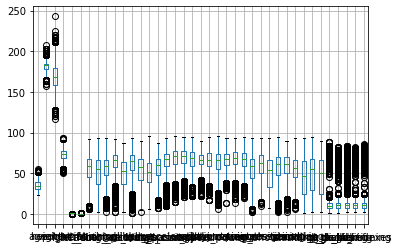

In [8]:
X_train.boxplot()

In [9]:
from sklearn.preprocessing import RobustScaler
# 이상치에 영향을 줄임
scaler= RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
#svm 모형은 데이터의 양이 많을 경우 많은 메모리를 사용하여 속도가 매우 느려질 수 있으므로 
#BaggingClassifier를 사용하는 것을 권장함
# 1개의 기계학습모형이지만 데이터 샘플을 중복사용하여 서로 다른 결과를 출력하는 다수의 모형을 비교
svm = SVC()
n_estimators = 10 # 분류기의 수
model = BaggingClassifier(base_estimator=svm,
n_estimators=n_estimators,
max_samples=1/n_estimators, #1/10
n_jobs=-1)
model.fit(X_train_scaled,y_train)
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.9214677640603567


In [11]:
from sklearn.metrics import classification_report
pred=model.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1046
           1       0.92      0.94      0.93      1141

    accuracy                           0.92      2187
   macro avg       0.92      0.92      0.92      2187
weighted avg       0.92      0.92      0.92      2187



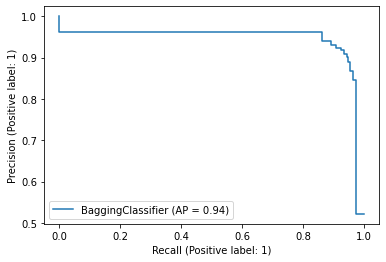

In [12]:
# precision과 recall의 절충점을 표현하는 그래프
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test_scaled, y_test)